## 資料預處理

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

D:\Python\envs\keras\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
np.random.seed(7)

In [19]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [20]:
X_train = X_train.reshape(X_train.shape[0],28*28).astype("float32")

In [21]:
X_test = X_test.reshape(X_test.shape[0],28*28).astype("float32")
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)

X_train Shape: (60000, 784)
X_test Shape: (10000, 784)


## 正規化

In [22]:
X_train = X_train/255
X_test = X_test/255
print(X_train[0][150:175])

[0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333336 0.6862745  0.10196079 0.6509804  1.
 0.96862745 0.49803922 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


## One-hoting Encoding

In [23]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape)
print(Y_train[0])

Y_train Shape:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 訓練模型

In [33]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [27]:
model = Sequential()
model.add(Dense(256,input_dim=28*28,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 編譯模型

In [28]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

## 訓練模型

In [30]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)

Epoch 1/10
375/375 - 2s - loss: 0.3443 - accuracy: 0.9030 - val_loss: 0.1797 - val_accuracy: 0.9504 - 2s/epoch - 6ms/step
Epoch 2/10
375/375 - 1s - loss: 0.1514 - accuracy: 0.9575 - val_loss: 0.1325 - val_accuracy: 0.9631 - 664ms/epoch - 2ms/step
Epoch 3/10
375/375 - 1s - loss: 0.1041 - accuracy: 0.9703 - val_loss: 0.1081 - val_accuracy: 0.9683 - 675ms/epoch - 2ms/step
Epoch 4/10
375/375 - 1s - loss: 0.0776 - accuracy: 0.9780 - val_loss: 0.1012 - val_accuracy: 0.9691 - 660ms/epoch - 2ms/step
Epoch 5/10
375/375 - 1s - loss: 0.0598 - accuracy: 0.9827 - val_loss: 0.0909 - val_accuracy: 0.9740 - 677ms/epoch - 2ms/step
Epoch 6/10
375/375 - 1s - loss: 0.0468 - accuracy: 0.9869 - val_loss: 0.0846 - val_accuracy: 0.9762 - 719ms/epoch - 2ms/step
Epoch 7/10
375/375 - 1s - loss: 0.0375 - accuracy: 0.9893 - val_loss: 0.0857 - val_accuracy: 0.9742 - 679ms/epoch - 2ms/step
Epoch 8/10
375/375 - 1s - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.0818 - val_accuracy: 0.9765 - 675ms/epoch - 2ms/step
Epo

In [31]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0264 - accuracy: 0.9937
訓練資料集的準確度 = 0.99
313/313 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9790
測試資料集的準確度 = 0.98


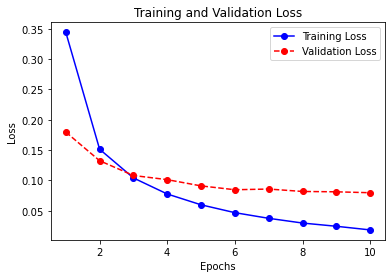

In [34]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

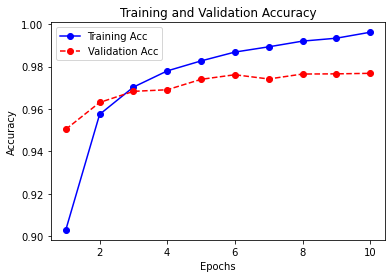

In [40]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 小結論:隨著訓練週期增加，訓練準確度有所提升，但驗證準確度的提升程度卻是愈來愈小，整體來看應該有過度擬合的問題存在

### 因此接下來會再增加一層隱藏層以觀察是否還會有過度擬合

In [41]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)

Epoch 1/10
375/375 - 1s - loss: 0.2960 - accuracy: 0.9158 - val_loss: 0.1362 - val_accuracy: 0.9600 - 1s/epoch - 4ms/step
Epoch 2/10
375/375 - 1s - loss: 0.1114 - accuracy: 0.9664 - val_loss: 0.1016 - val_accuracy: 0.9699 - 809ms/epoch - 2ms/step
Epoch 3/10
375/375 - 1s - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.0938 - val_accuracy: 0.9723 - 854ms/epoch - 2ms/step
Epoch 4/10
375/375 - 1s - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.0899 - val_accuracy: 0.9744 - 810ms/epoch - 2ms/step
Epoch 5/10
375/375 - 1s - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0884 - val_accuracy: 0.9741 - 836ms/epoch - 2ms/step
Epoch 6/10
375/375 - 1s - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0828 - val_accuracy: 0.9776 - 863ms/epoch - 2ms/step
Epoch 7/10
375/375 - 1s - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.1020 - val_accuracy: 0.9758 - 861ms/epoch - 2ms/step
Epoch 8/10
375/375 - 1s - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.1068 - val_accuracy: 0.9736 - 784ms/epoch - 2ms/step
Epo

In [45]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0343 - accuracy: 0.9908
訓練資料集的準確度 = 0.99
313/313 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9774
測試資料集的準確度 = 0.98


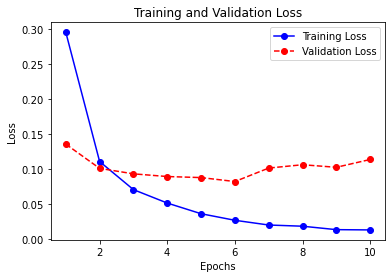

In [46]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 小結論:驗證損失與測試損失的差異愈來愈大，因此增加一層隱藏層似乎也無法解決過度擬合

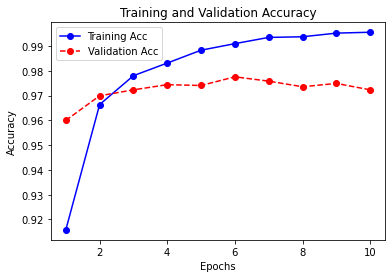

In [47]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 新增一層50% DropOut 層

In [49]:
from keras.layers import Dropout

In [50]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [53]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)

Epoch 1/10
375/375 - 2s - loss: 0.3982 - accuracy: 0.8791 - val_loss: 0.1515 - val_accuracy: 0.9548 - 2s/epoch - 5ms/step
Epoch 2/10
375/375 - 1s - loss: 0.1879 - accuracy: 0.9434 - val_loss: 0.1195 - val_accuracy: 0.9631 - 896ms/epoch - 2ms/step
Epoch 3/10
375/375 - 1s - loss: 0.1479 - accuracy: 0.9544 - val_loss: 0.0991 - val_accuracy: 0.9688 - 791ms/epoch - 2ms/step
Epoch 4/10
375/375 - 1s - loss: 0.1246 - accuracy: 0.9613 - val_loss: 0.0919 - val_accuracy: 0.9719 - 809ms/epoch - 2ms/step
Epoch 5/10
375/375 - 1s - loss: 0.1127 - accuracy: 0.9653 - val_loss: 0.0885 - val_accuracy: 0.9738 - 853ms/epoch - 2ms/step
Epoch 6/10
375/375 - 1s - loss: 0.0991 - accuracy: 0.9689 - val_loss: 0.0857 - val_accuracy: 0.9732 - 898ms/epoch - 2ms/step
Epoch 7/10
375/375 - 1s - loss: 0.0928 - accuracy: 0.9699 - val_loss: 0.0816 - val_accuracy: 0.9756 - 865ms/epoch - 2ms/step
Epoch 8/10
375/375 - 1s - loss: 0.0835 - accuracy: 0.9735 - val_loss: 0.0794 - val_accuracy: 0.9767 - 902ms/epoch - 2ms/step
Epo

In [54]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0356 - accuracy: 0.9896
訓練資料集的準確度 = 0.99
313/313 [==============================] - 0s 1ms/step - loss: 0.0713 - accuracy: 0.9785
測試資料集的準確度 = 0.98


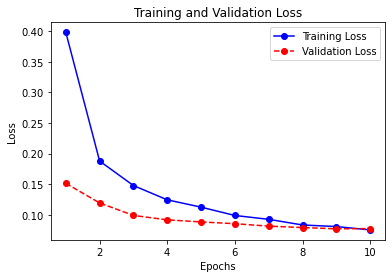

In [56]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

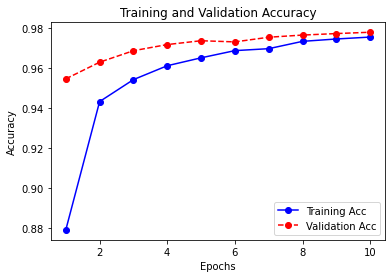

In [55]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()